# Tarea N°01

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Gabriel Moya Valenzuela

* __Rol__:    201710531-3

2.- Debes _pushear_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.-  Imagenception

Desde [Wikipedia](https://es.wikipedia.org/wiki/RGB), __RGB__ (sigla en inglés de red, green, blue) es un modelo de color basado en la síntesis aditiva, con el que es posible representar un color mediante la mezcla por adición de los tres colores de luz primarios. El modelo de color RGB no define por sí mismo lo que significa exactamente rojo, verde o azul, por lo que los mismos valores RGB pueden mostrar colores notablemente diferentes en distintos dispositivos que usen este modelo de color. Aunque utilicen un mismo modelo de color, sus espacios de color pueden variar considerablemente.

Para indicar con qué proporción es mezclado cada color, se asigna un valor a cada uno de los colores primarios, de manera que el valor "0" significa que no interviene en la mezcla y, a medida que ese valor aumenta, se entiende que aporta más intensidad a la mezcla. Aunque el intervalo de valores podría ser cualquiera (valores reales entre 0 y 1, valores enteros entre 0 y 37, etc.), es frecuente que cada color primario se codifique con un byte (8 bits).

Así, de manera usual, la intensidad de cada una de las componentes se mide según una escala que va del 0 al 255 y cada color es definido por un conjunto de valores escritos entre paréntesis (correspondientes a valores "R", "G" y "B") y separados por comas.

El conjunto de todos los colores también se puede representar en forma de cubo. Cada color es un punto de la superficie o del interior de éste. La escala de grises estaría situada en la diagonal que une al color blanco con el negro.

![rgb](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Avl3119color4a.svg/800px-Avl3119color4a.svg.png)

Para efectos prácticos del curso, es posible representar cada pixel de una imagen con un array de 3 dimensiones, cada valor representa a una de las capas RGB. Por lo tanto, una imagen de $n \times m$ pixeles se representa como un arreglo de dimension $(n, m , 3)$ En `Python` una de las librerías de procesamiento de imágenes más utilizada es `Pillow`.

Abrir una imagen es tan fácil como:

In [1]:
# librerias

import os
import numpy as np
from PIL import Image

In [2]:
gatito = Image.open(os.path.join("images", "gatito.png"))


Notar que la variable anterior es de una clase específica de la librería.

In [3]:
type(gatito)

PIL.PngImagePlugin.PngImageFile

Para ver la imagen en Jupyter puedes utilizar la misma técnica que con los `pd.DataFrames`, es decir:

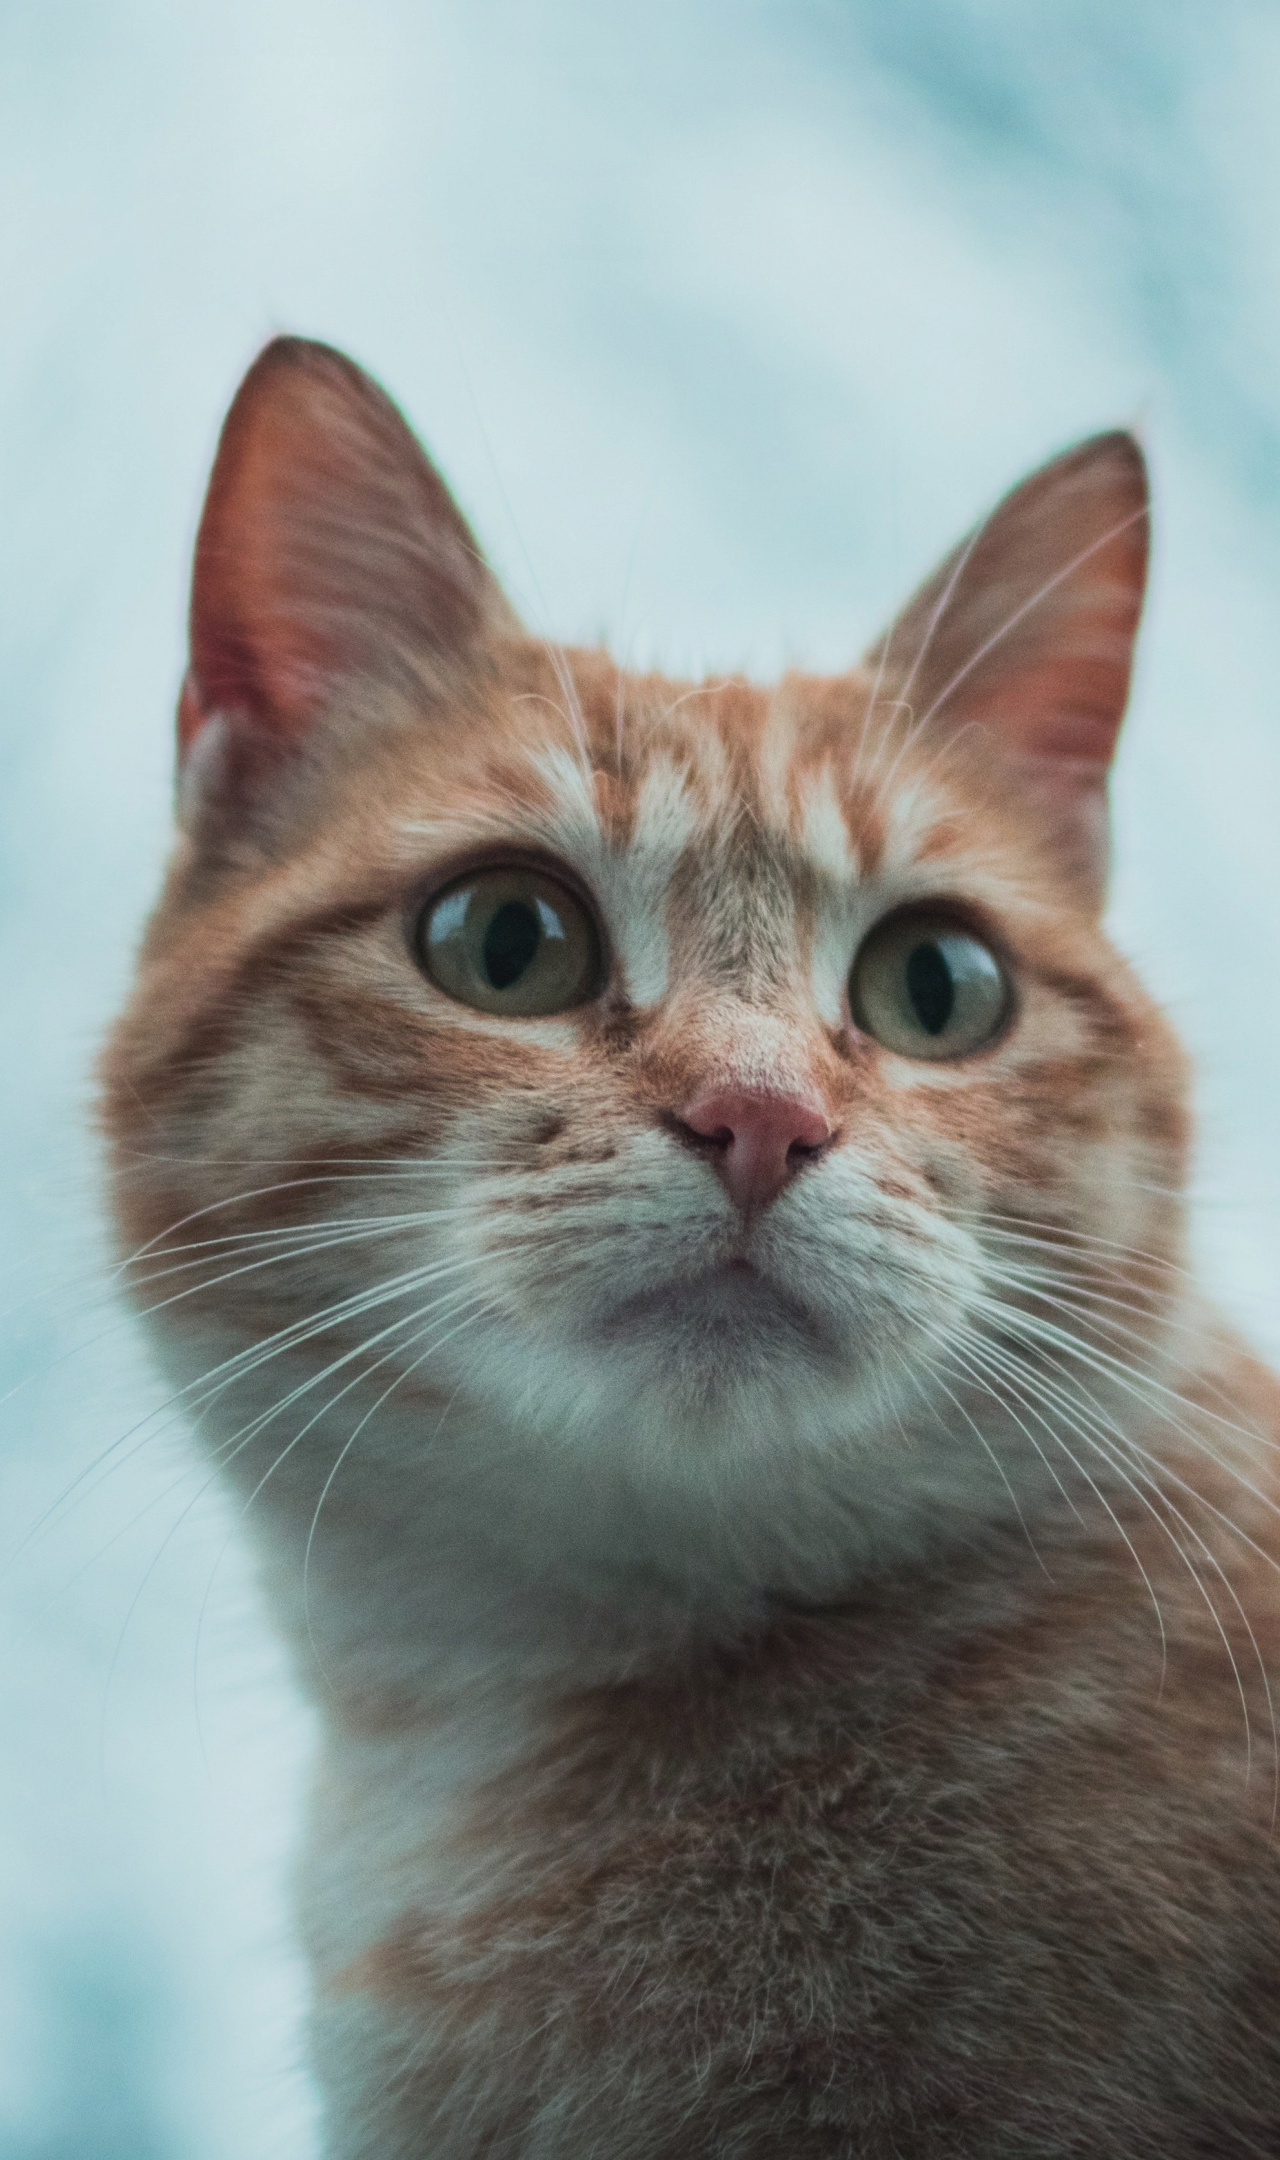

In [4]:
gatito

Para tener su representación en un array podemos utilizar el constructor `np.array` con argumento la imagen.

In [5]:
gatito_np = np.array(gatito)
print(f"Dimension de la imagen gatito: {gatito_np.shape}.\n")
print(f"Al convertir a np.ndarry el tipo de elementos es {gatito_np.dtype}.\n")
print(gatito_np)

Dimension de la imagen gatito: (2160, 1280, 3).

Al convertir a np.ndarry el tipo de elementos es uint8.

[[[179 211 215]
  [179 211 215]
  [179 209 215]
  ...
  [171 201 209]
  [171 201 209]
  [169 199 207]]

 [[181 213 217]
  [181 213 217]
  [181 211 217]
  ...
  [173 203 211]
  [173 203 211]
  [171 201 209]]

 [[179 211 215]
  [179 211 215]
  [181 211 217]
  ...
  [173 203 211]
  [173 203 211]
  [173 203 211]]

 ...

 [[125 179 190]
  [123 177 188]
  [129 183 194]
  ...
  [ 41  36  33]
  [ 43  38  35]
  [ 45  40  37]]

 [[127 181 192]
  [125 179 190]
  [127 181 192]
  ...
  [ 43  38  37]
  [ 43  38  37]
  [ 45  40  37]]

 [[125 179 190]
  [123 177 188]
  [123 177 188]
  ...
  [ 49  44  43]
  [ 45  40  37]
  [ 43  38  35]]]


### 1.- Encontrando la imagen oculta

La imagen anterior tiene una imagen oculta, el ejercicio corresponde en descifrarlo. Las instrucciones son las siguientes:

1.1 Crear una lista vacía declarada como `secret_list`.

In [6]:
secret_list = []

1.2 Iterar por cada uno de los canales RGB (`gatito_np.shape[2]`) y en cada iteración:
 * Crear un arreglo temporal llamado `secret_aux` de dos dimensiones, de la misma dimension de pixeles de la imagen `gatito` y que tenga valores enteros, `0` si el valor de la capa de `gatito_np` es par y `1` si es impar. 
  - No iterar por filas y columnas.
  - Utilizar la operación módulo `%`. 
  - En la i-ésima iteración de los canales la capa de `gatito_np` es `gatito_np[:, :, i]`.
        
        
 * Escalar `secret_aux` a valores 0 y 255.
    
 * Cambiar el `dtype` de `secret_aux` a `np.uint8` (utilize el méteodo `astype()`).
            
 * Agregue `secret_aux` a `secret_list`.
    
Al final de la iteración `secret_list` debe tener solo tres arreglos.

**Observación:** recuerde que puede aplicar operaciones directo a un arreglo de numpy.

In [7]:
secret_aux_1 = np.ones((2160,1280));
secret_aux_2 = np.ones((2160,1280));
secret_aux_3 = np.ones((2160,1280));

c = 0;
d = 0;
for channel in gatito_np:
    for i in channel:
        if i[0]%2 == 0:
            secret_aux_1[c][d] = 0;
        else:
            secret_aux_1[c][d] = 255;
        if i[1]%2 == 0:
            secret_aux_2[c][d] = 0;
        else:
            secret_aux_2[c][d] = 255;
        if i[2]%2 == 0:
            secret_aux_3[c][d] = 0;
        else:
            secret_aux_3[c][d] = 255;
        d = d +1
    d = 0;
    c = c + 1;

secret_list.append(secret_aux_1.astype(np.uint8));
secret_list.append(secret_aux_2.astype(np.uint8));
secret_list.append(secret_aux_3.astype(np.uint8));

print(secret_list)


[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)]


In [8]:
print(f"secret_list tiene {len(secret_list)} elementos")

secret_list tiene 3 elementos


1.3 Crear la variable `secret_np` concatenando horizontalmente los elementos de `secret_list`.

In [9]:
secret_np = np.concatenate((secret_list[0],secret_list[1],secret_list[2]), axis=1);
secret_np.shape

(2160, 3840)

1.4 Crear el objeto `secret_img` utilizando el arreglo `secret_np`, asegurar que los valores estén entre 0 y 255, y que el dtype sea `np.uint8`, con el método `Image.fromarray` con argumento `mode="L"`

In [10]:
np.unique(secret_np)

array([  0, 255], dtype=uint8)

In [11]:
secret_np.dtype

dtype('uint8')

In [12]:
secret_img = Image.fromarray(secret_np,mode="L")

Ahora puedes ver el resultado!

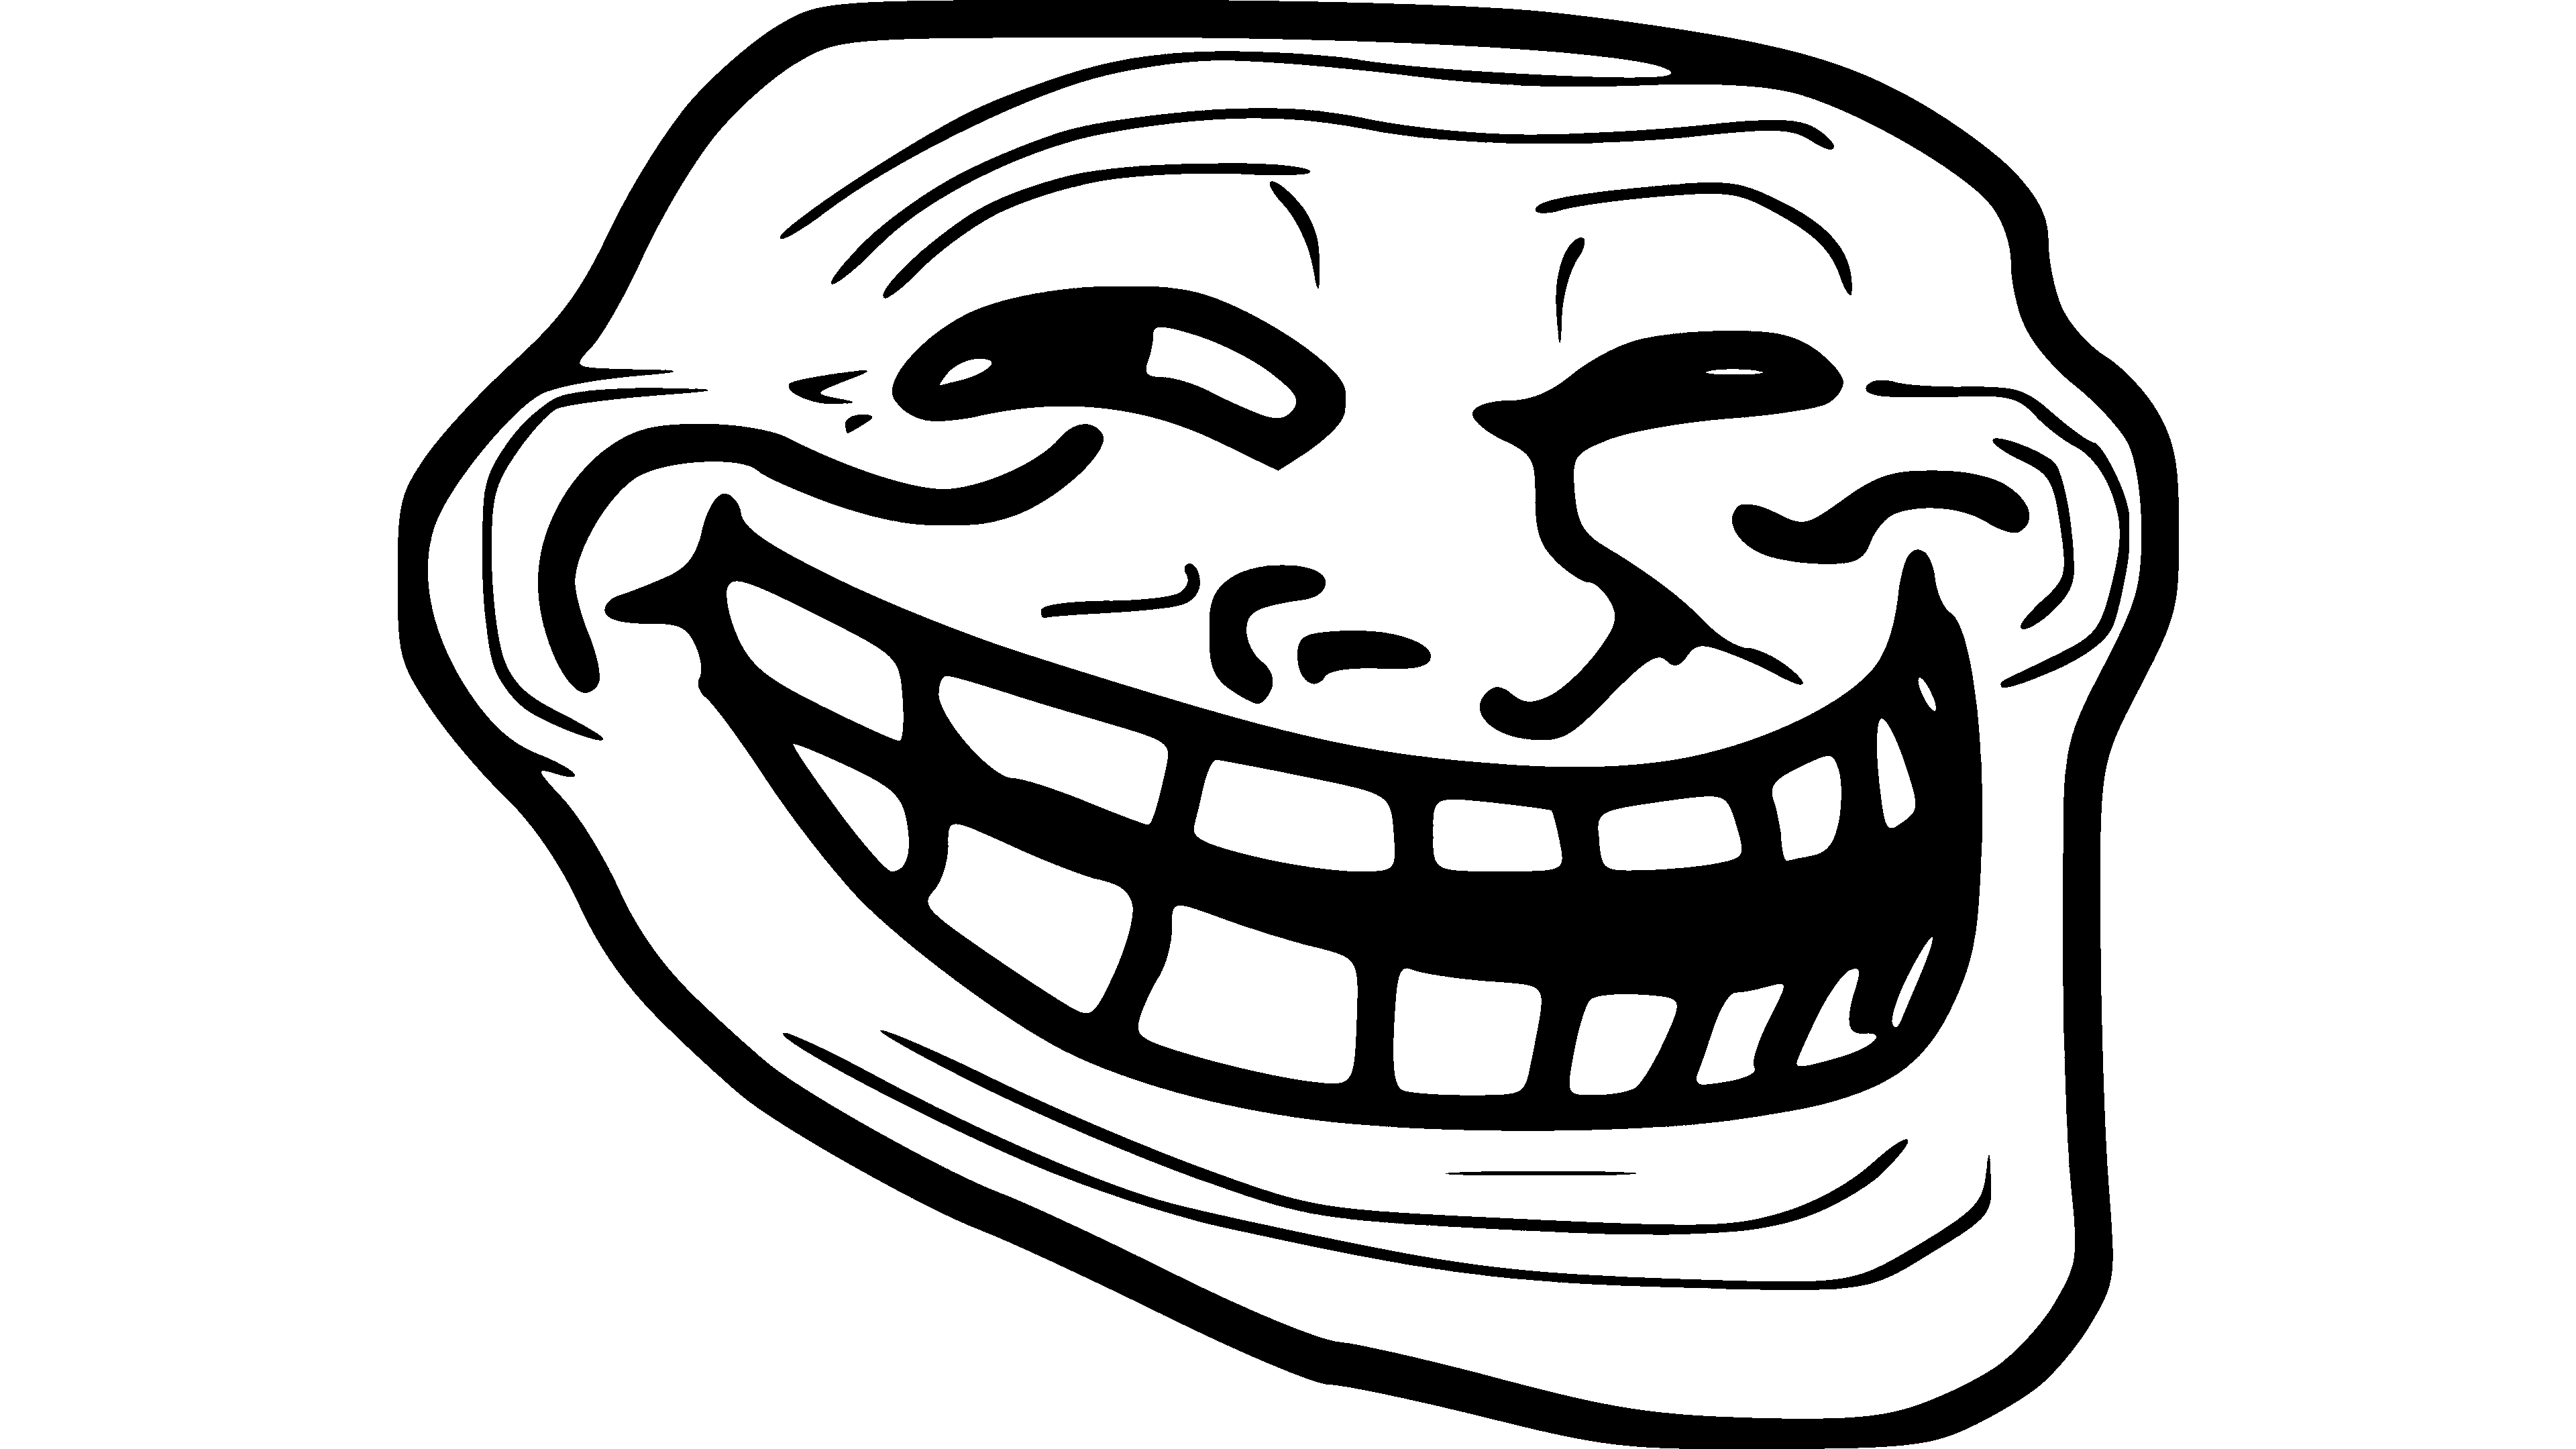

In [13]:
secret_img

### 2.- Escondiendo una nueva imagen

Es tu turno, ahora tu esconderás una imagen. Las instrucciones son las siguientes:

2.1 Selecciona una imagen de 2160 x 3840 pixeles (a.k.a resolución 4k), lo importante es que sea solo en blanco y negro, en la carpeta `images` se disponibiliza como ejemplo la imagen `black_and_white_example.jpg` y crea una variable llamada `my_img` leyendo la imagen seleccionada con `Image.open()`.

In [14]:
my_img = Image.open(os.path.join("images", "rambo.jpg"))

2.2 Crea un arreglo llamado `my_img_np` utilizando `my_img` y el método `np.array()`.
    * Es importante que `my_img_np.shape` sea `(2160, 3840)`, es decir, que solo sea de dos dimensiones. Esto porque es una imagen en blanco y negro, no necesitando el modelo RGB.

In [15]:
aux = my_img.convert(mode='L')
aux.save(os.path.join("images", "rambo2.jpg"))
my_img_np = np.array(aux)
print(my_img_np.shape)
my_img_np

(2160, 3840)


array([[255, 248, 255, ...,   6,   0,   1],
       [245,  16, 249, ...,   6,   7,   2],
       [248, 255, 251, ...,   0,   0,   6],
       ...,
       [  4, 255,   0, ..., 246,   0,  19],
       [  0,  15,   4, ...,   0,  22, 228],
       [255,   0,   0, ...,  10, 241,  15]], dtype=uint8)

¡¡¡Para que la celda de abajo funcione hay que hacer correr la celda de arriba!!!

2.3 Crear la variable `my_img_np_aux` utilizando un _umbral_ con tal de que:
    - 1: Si el valor del pixel es mayor  al _umbral_.
    - 0: Si el valor del pixel es menor o igual al _umbral_.
    - El `dtype` debe ser `np.uint8`.
    - Para `black_and_white_example.jpg` un umbral adecuado es `20`.

In [16]:
umbral = 50;
my_img_np_aux = my_img_np
c = 0;
d = 0;
for channel in my_img_np:
    for i in channel:
        if i <= umbral:
            my_img_np_aux[c][d] = 0;
        else:
            my_img_np_aux[c][d] = 1;
        d = d + 1;
    c = c + 1;
    d = 0; 
my_img_np_aux


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 1, 0]], dtype=uint8)

Puedes probar que tan bien quedó la imagen con la siguiente linea. Si crees que no se ve bien, puedes cambiar el _umbral_.

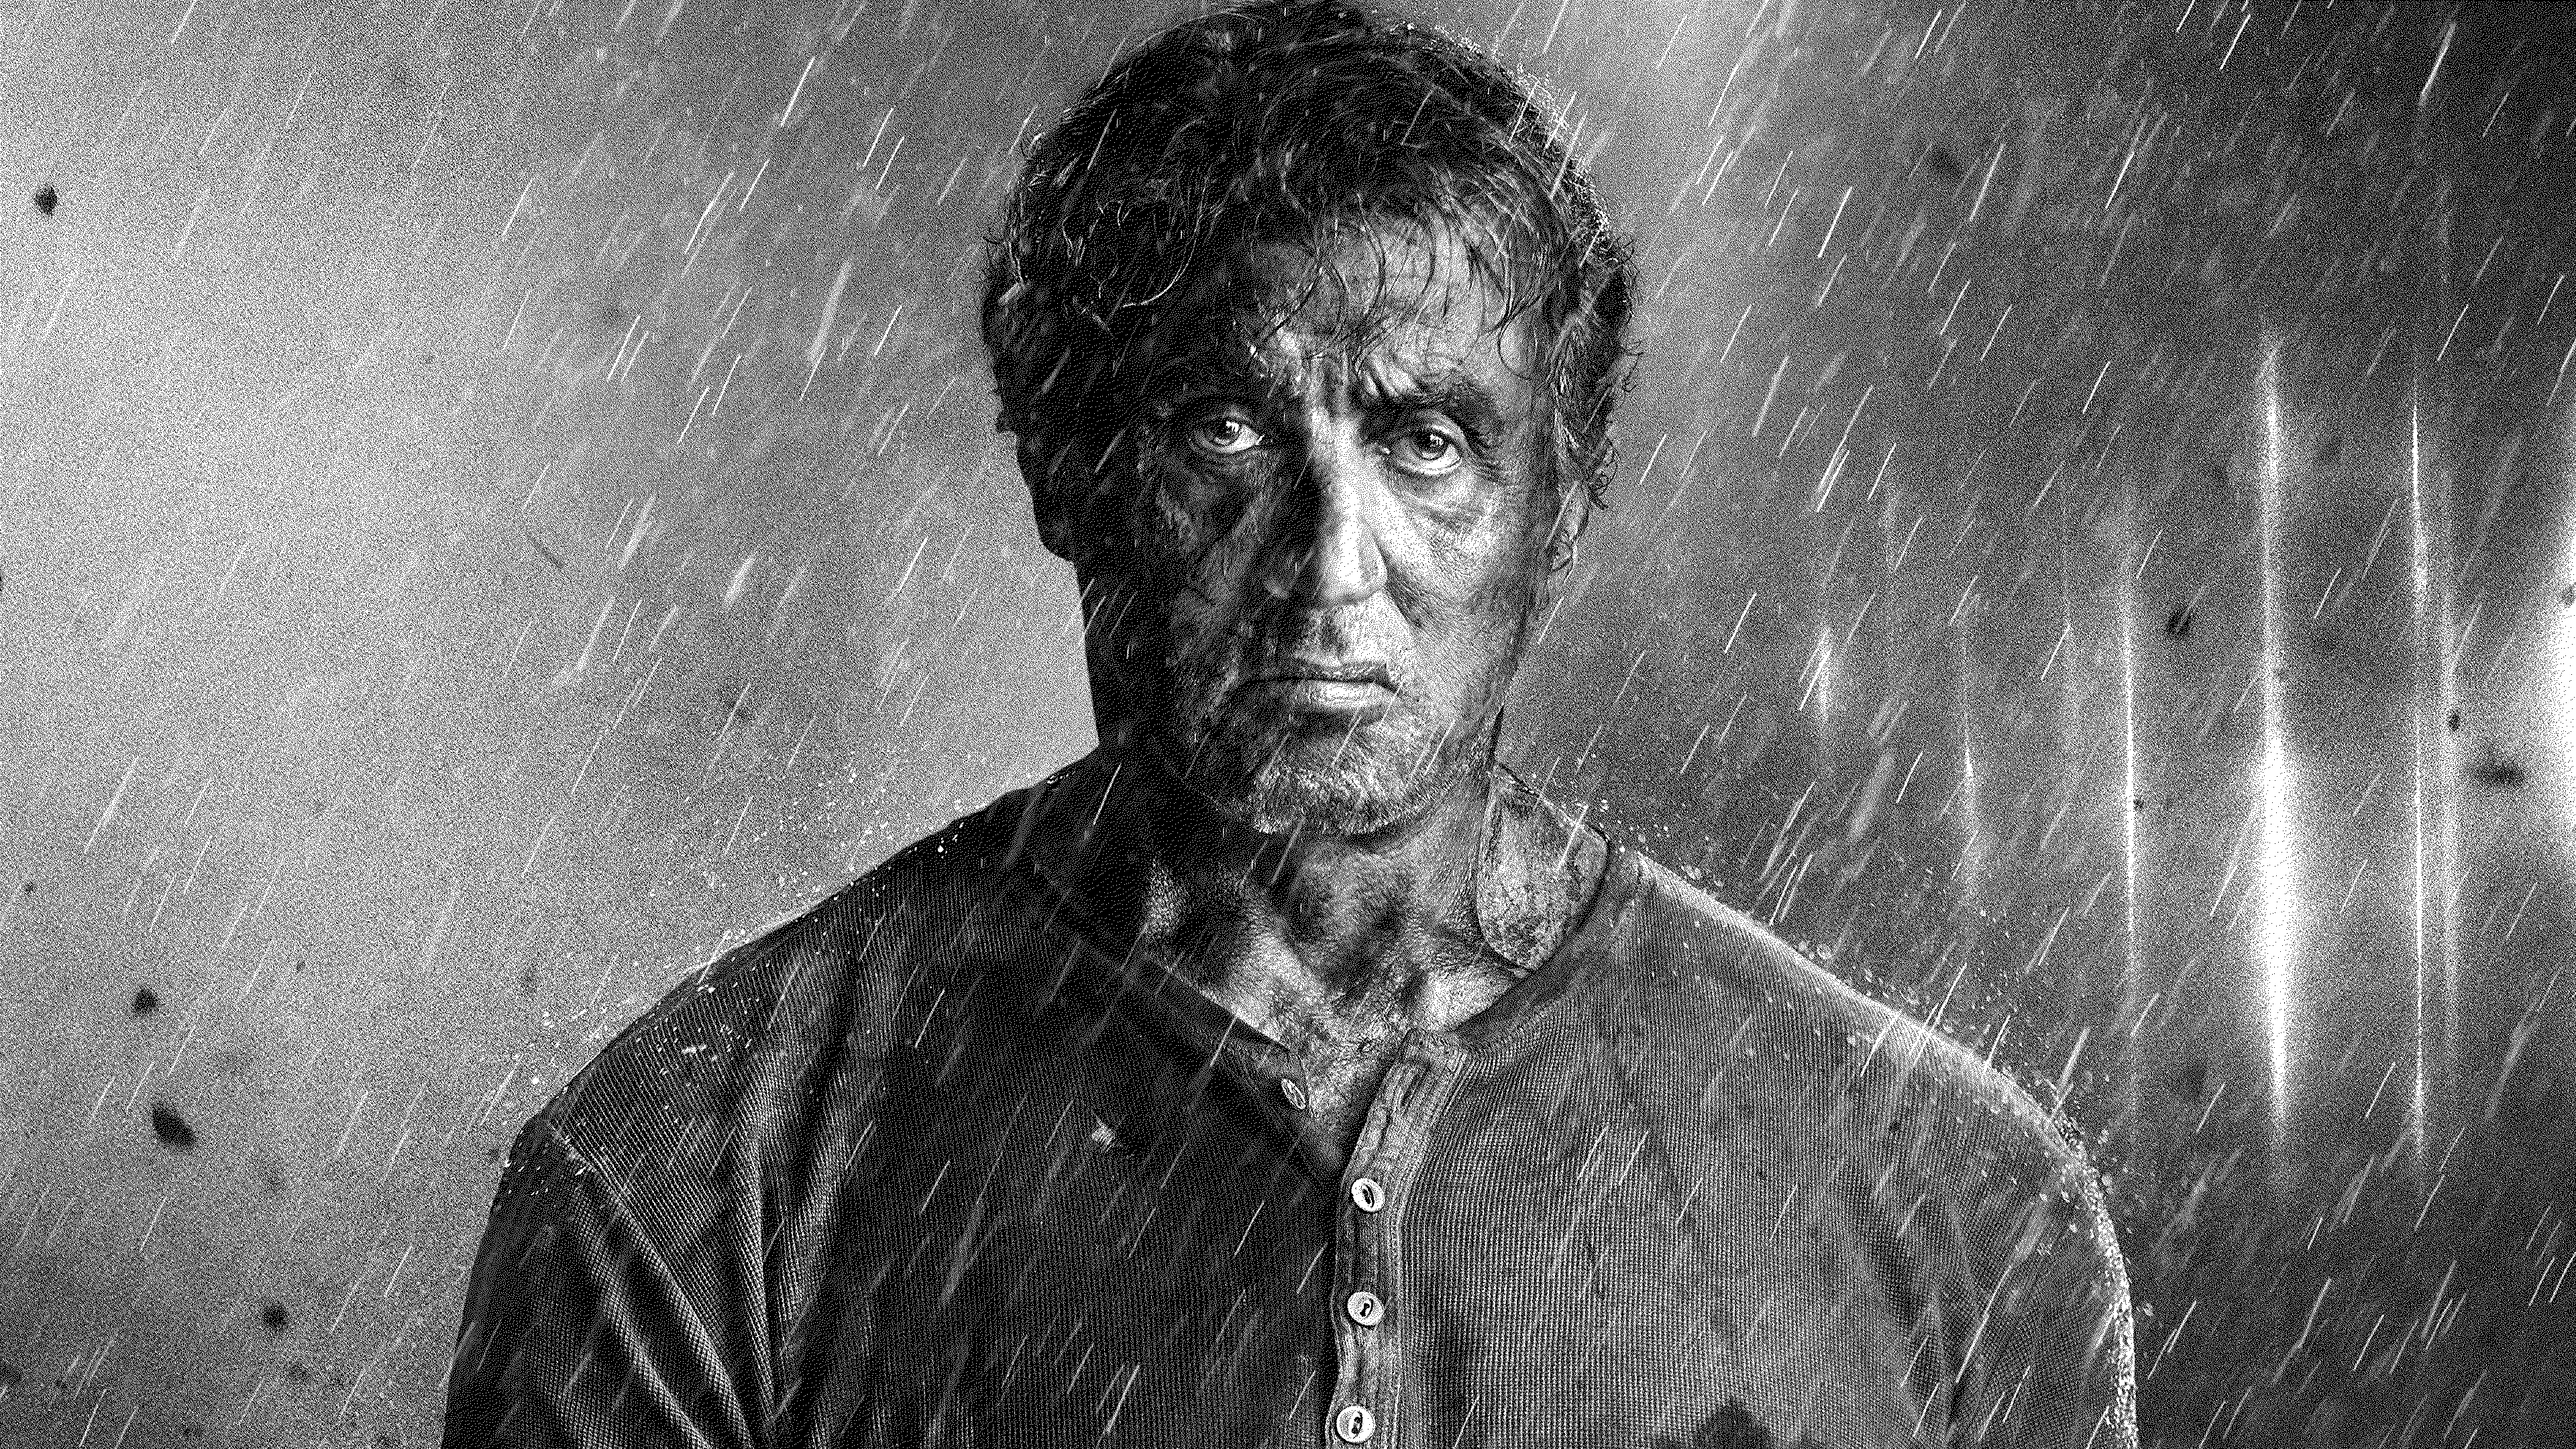

In [17]:
Image.fromarray(my_img_np_aux * 255)

¡¡¡Es importante hacer correr las celdas en orden!!!

2.4 Dividir la imagen en tres arreglos de tamaño (2160, 1280) y guardarlos en una lista con el nombre `my_img_split`. Hint: Revisa en la documentación de `numpy`.

In [18]:
A = my_img_np_aux[:,np.r_[0:1280]];
B = my_img_np_aux[:,np.r_[1280:2560]];
C = my_img_np_aux[:,np.r_[2560:3840]];

my_img_split = [];

my_img_split.append(A);
my_img_split.append(B);
my_img_split.append(C);

print(my_img_split)



[array([[1, 1, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1]], dtype=uint8), array([[0, 0, 1, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 1, 1],
       [1, 0, 1, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8), array([[1, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)]


Revisa utilizando la siguiente iteración.

In [19]:
for img_array in my_img_split:
    print(img_array.shape)

(2160, 1280)
(2160, 1280)
(2160, 1280)


2.5 La imagen donde se esconderá tu imagen selecionada está en la carpeta `images` con el nombre `gatito_original.png`, que sospechosamente es de 2160 x 1280 pixeles. Carga la imagen en la variable `cat` y luego crea arreglo `cat_np` utilizando `cat`. Verifica que `cat_np.shape = (2160, 1280, 3)`.

In [20]:
cat = Image.open(os.path.join("images", "gatito_original.png"));
cat_np = np.array(cat);
print(cat_np.shape)

(2160, 1280, 3)


2.6 Convierte todos los valores de `cat_np` a valores pares. Esto lo puedes hacer sumando 1 a cada valor de arreglo si es impar

In [21]:
c = 0;
d = 0;
for channel in cat_np:
    for i in channel:
        if i[0]%2 != 0:
            cat_np[c][d][0] += 1;
        if i[1]%2 != 0:
            cat_np[c][d][1] += 1;
        if i[2]%2 != 0:
            cat_np[c][d][2] += 1;
        d = d +1
    d = 0;
    c = c + 1;
cat_np

array([[[178, 210, 214],
        [178, 210, 214],
        [178, 208, 214],
        ...,
        [170, 200, 208],
        [170, 200, 208],
        [168, 198, 206]],

       [[180, 212, 216],
        [180, 212, 216],
        [180, 210, 216],
        ...,
        [172, 202, 210],
        [172, 202, 210],
        [170, 200, 208]],

       [[178, 210, 214],
        [178, 210, 214],
        [180, 210, 216],
        ...,
        [172, 202, 210],
        [172, 202, 210],
        [172, 202, 210]],

       ...,

       [[124, 178, 190],
        [122, 176, 188],
        [128, 182, 194],
        ...,
        [ 40,  36,  32],
        [ 42,  38,  34],
        [ 44,  40,  36]],

       [[126, 180, 192],
        [124, 178, 190],
        [126, 180, 192],
        ...,
        [ 42,  38,  36],
        [ 42,  38,  36],
        [ 44,  40,  36]],

       [[124, 178, 190],
        [122, 176, 188],
        [122, 176, 188],
        ...,
        [ 48,  44,  42],
        [ 44,  40,  36],
        [ 42,  38,  34]]

2.7 Itera por canal RGB de `cat_np` y en cada capa suma los valores de uno de los arreglos de `my_img_split`.

In [22]:
c = 0;
d = 0;
for channel in cat_np:
    for i in channel:
        e = 0
        for img_array in my_img_split:
            i[e] = i[e] + img_array[c][d];
            e = e + 1;
        d = d +1;
    d = 0;
    c = c + 1;
cat_np

array([[[179, 210, 215],
        [179, 210, 215],
        [179, 209, 215],
        ...,
        [170, 201, 208],
        [171, 201, 208],
        [168, 198, 206]],

       [[181, 213, 216],
        [180, 212, 217],
        [181, 210, 216],
        ...,
        [172, 203, 210],
        [172, 203, 210],
        [171, 201, 208]],

       [[179, 211, 215],
        [179, 210, 215],
        [181, 211, 216],
        ...,
        [173, 202, 210],
        [173, 203, 210],
        [172, 202, 210]],

       ...,

       [[124, 178, 190],
        [123, 176, 188],
        [128, 182, 195],
        ...,
        [ 40,  36,  33],
        [ 42,  38,  34],
        [ 44,  41,  36]],

       [[126, 180, 192],
        [124, 178, 190],
        [126, 180, 192],
        ...,
        [ 42,  39,  36],
        [ 42,  38,  36],
        [ 44,  40,  37]],

       [[125, 178, 190],
        [122, 176, 188],
        [122, 176, 188],
        ...,
        [ 48,  44,  42],
        [ 44,  40,  37],
        [ 43,  39,  34]]

2.8 Crea una variable llamada `cat_secret_im` con `Image.fromarray` y la variable `cat_np` (que ya ha sido modificada). Luego guarda la imagen en la carpeta `images` con el nombre `my_secret.png`.

In [23]:
cat_secret_im = Image.fromarray(cat_np)
cat_secret_im.save(os.path.join("images", "my_secret.png"))

2.9 Crea una función llamada `imagenception()` que como argumento tenga la ruta de la imagen que quieres descifrar y que descifre la imagen secreta recientemente creada. Hint: Utiliza todos los pasos de la primera parte. 

In [24]:
def imagenception(filepath):
    gatito = Image.open(filepath)
    gatito_np = np.array(gatito)
    secret_list = [];
    secret_aux_1 = np.ones((2160,1280));
    secret_aux_2 = np.ones((2160,1280));
    secret_aux_3 = np.ones((2160,1280));

    c = 0;
    d = 0;
    for channel in gatito_np:
        for i in channel:
            if i[0]%2 == 0:
                secret_aux_1[c][d] = 0;
            else:
                secret_aux_1[c][d] = 255;
            if i[1]%2 == 0:
                secret_aux_2[c][d] = 0;
            else:
                secret_aux_2[c][d] = 255;
            if i[2]%2 == 0:
                secret_aux_3[c][d] = 0;
            else:
                secret_aux_3[c][d] = 255;
            d = d +1
        d = 0;
        c = c + 1;
    secret_list.append(secret_aux_1.astype(np.uint8));
    secret_list.append(secret_aux_2.astype(np.uint8));
    secret_list.append(secret_aux_3.astype(np.uint8));
    secret_np = np.concatenate((secret_list[0],secret_list[1],secret_list[2]), axis=1);
    secret_img = Image.fromarray(secret_np,mode="L")
    return secret_img

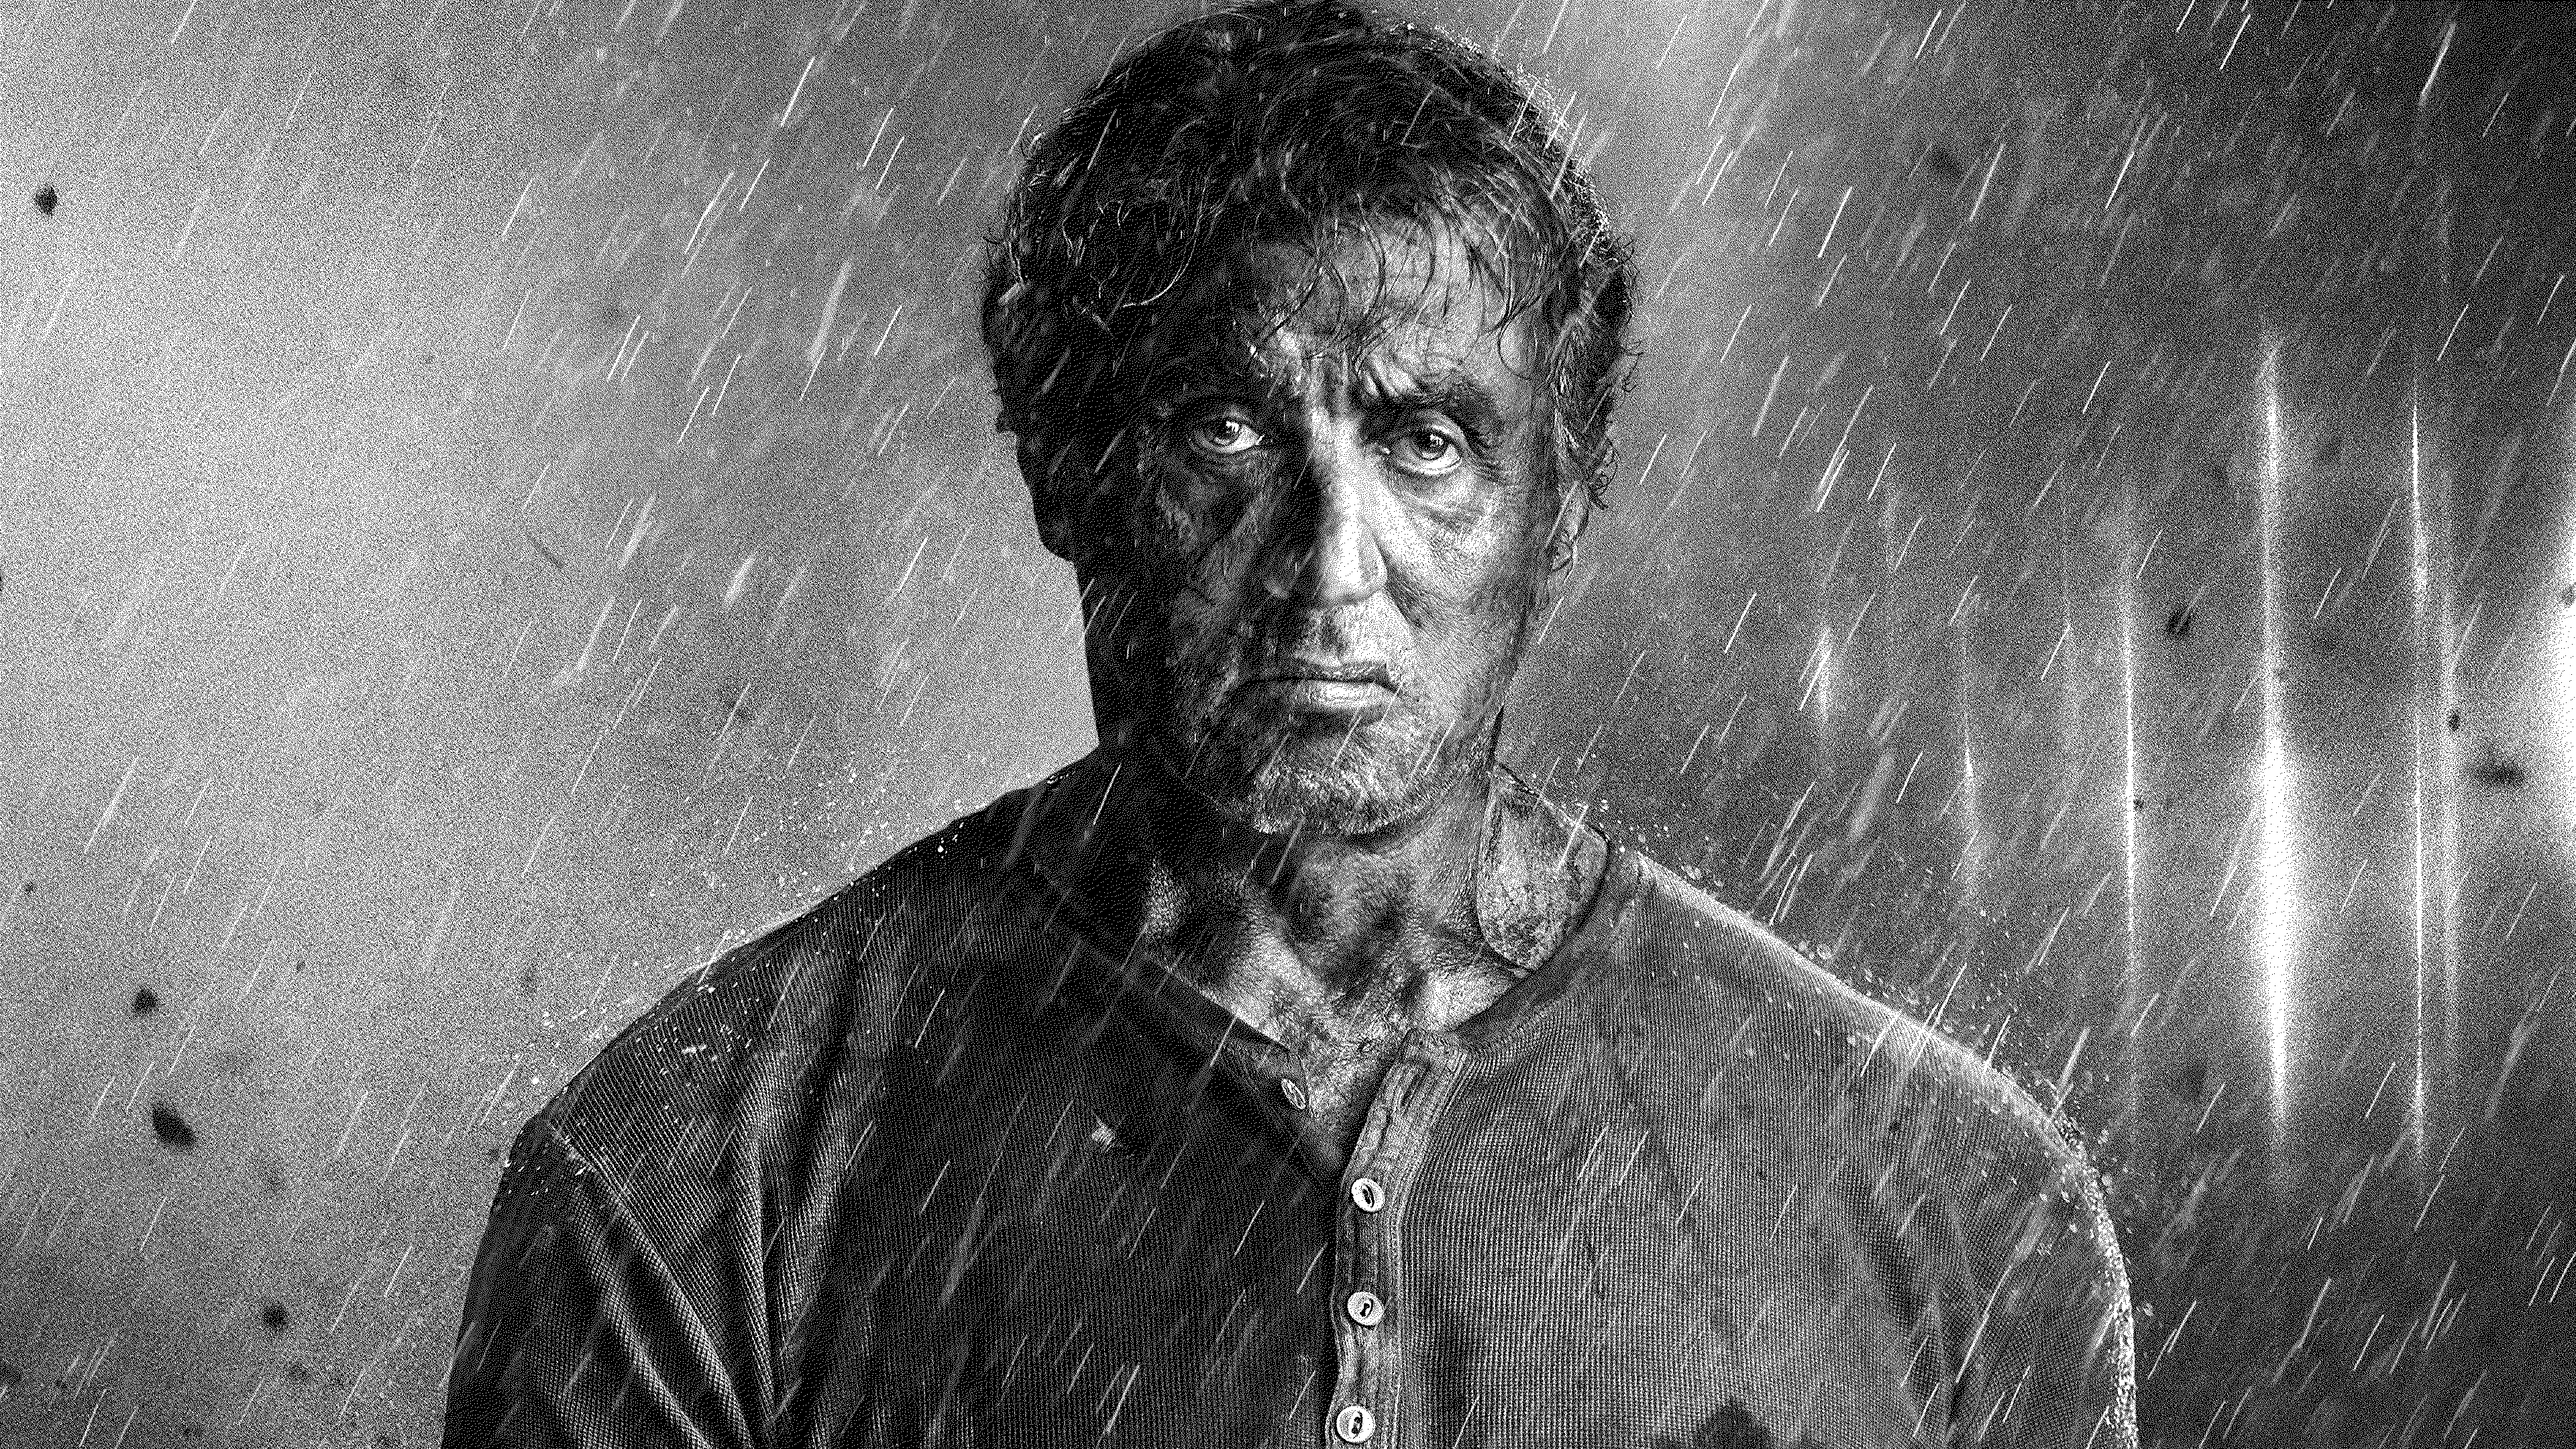

In [25]:
my_secret_img = imagenception(os.path.join("images", "my_secret.png"))
my_secret_img

## II.- Analizando la Felicidad

<img src="https://static01.nyt.com/images/2019/09/29/opinion/sunday/29HolsonStill/29HolsonStill-popup.jpg" width="480" height="360" align="center"/>

Este ejercicio es netamente análisis de datos, tratando de abarcar problemas típicos como la lectura de datos, corrección de errores, métricas agrupadas, unión de datos, etc. Utilizaremos un conjunto de datos llamado __World Happiness Report__ disponible en el siguiente [link](https://www.kaggle.com/unsdsn/world-happiness), de donde se puede obtener información al respecto.

#### Context
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#### Content
The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.


### 2.1 Lectura de datos

In [26]:
# libraries
import os
import pandas as pd
pd.set_option("display.max_columns", 999)  # Permite mostrar hasta 999 columnas de un DataFrame en Jupyter.

En la carpeta `data/world-happiness` se disponen de tres archivos, uno por cada reporte anual (años 2015, 2016 y 2017). No es de sorprender que envíen un archivo por año (podría ser mensual, semestral, etc.), lo imortante es ser capaces de leer una cantidad __variable__ de archivos al mismo tiempo. Una buena práctica es crear un diccionario de dataframes.

In [27]:
# Comprehension dictionary
df_dict = {
    year: pd.read_csv(os.path.join("data", "world-happiness", f"{year}.csv"))
    for year in [2015, 2016, 2017]
}

Por ejemplo, se puede acceder al DataFrame asociado al archivo `data/world-happiness/2016.csv` de la siguiente manera:

In [28]:
df_dict[2016].head()

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

Una pequeña descripción de las columnas

* `Country` Name of the country.
* `Region` Region the country belongs to.
* `Happiness Rank` Rank of the country based on the Happiness Score.
* `Happiness Score` A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
* `Standard Error` The standard error of the happiness score.
* `Economy (GDP per Capita)` The extent to which GDP contributes to the calculation of the Happiness Score.
* `Family` The extent to which Family contributes to the calculation of the Happiness Score
* `Health (Life Expectancy)` The extent to which Life expectancy contributed to the calculation of the Happiness Score
* `Freedom` The extent to which Freedom contributed to the calculation of the Happiness Score.
* `Trust (Government Corruption)` The extent to which Perception of Corruption contributes to Happiness Score.
* `Generosity` The extent to which Generosity contributed to the calculation of the Happiness Score.
* `Dystopia Residual` The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

Notar que los conjuntos de datos no poseen las mismas columnas, por lo tanto, solo se trabajarán con las columnas en común y posteriormente agregaremos el año con tal de concatenar los tres conjuntos.

In [29]:
from functools import reduce
intersection_columns = reduce(np.intersect1d, [df_i.columns.values for df_i in df_dict.values()]).tolist() + ["Year"]
print(intersection_columns)

['Country', 'Dystopia Residual', 'Economy (GDP per Capita)', 'Family', 'Freedom', 'Generosity', 'Happiness Rank', 'Happiness Score', 'Health (Life Expectancy)', 'Trust (Government Corruption)', 'Year']


Explica con tus palabras las operaciones que se realizaron para obtener la variable `intersection_columns`.

__Respuesta:__  < La funcion np.intersect1d devuelve los elementos comunes entre 2 arrays, mientras que reduce toma una lista de elementos iterables y les aplica la funcion np.intersect1d acumulativamente, en otras  palabras, se intersecta los nombres de las columnas de 2015 y 2016, y el resultado se intersecta con 2017. >

### 2.2 Concatenación y procesado

Define el DataFrame `happiness` tal que:

* Sea la concatenación de los dataframes de `df_dict`
    - Nota que en la documentación de `pd.concat` puedes entregar como argumento directamente un diccionario.
    - No ordenes los _axis_ (ver documentación).
    - Los nombres de los _levels_ para los multi-index resultante deben ser `["Year", "drop_me"]`.
* Aplica el método `drop_level` con tal de eliminar el nivel del multi-index llamado `drop_me`.
* Resetea los índices.
* Selecciona solo las columnas de la lista `intersection_columns`.
* Los nombres de las columnas deben estar en minísculas, reemplazar espacios por guiones bajos (`_`) y elimina los paréntesis.


In [30]:
happiness = (
    pd.concat(df_dict,names=["Year", "drop_me"])
    .droplevel('drop_me')
    .reset_index()
    .dropna(axis=1,how='any')
    .rename(columns={'Country' : "country", 'Dystopia Residual' : "dystopia_residual",
                      'Economy (GDP per Capita)' : "economy", 'Family' : "family",
                      'Freedom' : 'freedom', 'Generosity' : 'generosity',
                      'Happiness Rank' : 'happiness_rank', 'Happiness Score' : 'happiness_score',
                      'Health (Life Expectancy)' : 'health', 'Trust (Government Corruption)' : 'trust', 
                      'Year' : "year"})
)

happiness.head()

year      country  happiness_rank  happiness_score  economy   family  \
0  2015  Switzerland               1            7.587  1.39651  1.34951   
1  2015      Iceland               2            7.561  1.30232  1.40223   
2  2015      Denmark               3            7.527  1.32548  1.36058   
3  2015       Norway               4            7.522  1.45900  1.33095   
4  2015       Canada               5            7.427  1.32629  1.32261   

    health  freedom    trust  generosity  dystopia_residual  
0  0.94143  0.66557  0.41978     0.29678            2.51738  
1  0.94784  0.62877  0.14145     0.43630            2.70201  
2  0.87464  0.64938  0.48357     0.34139            2.49204  
3  0.88521  0.66973  0.36503     0.34699            2.46531  
4  0.90563  0.63297  0.32957     0.45811            2.45176

### 2.3 Análisis

Como siempre, partimos con un análisis descriptivo simple.

In [31]:
happiness.describe(include="all").fillna("").T

count unique          top freq         mean        std  \
year               470.0                           2015.993617   0.816907   
country              470    166  Switzerland    3                           
happiness_rank     470.0                             78.829787  45.281408   
happiness_score    470.0                              5.370728   1.136998   
economy            470.0                               0.92783   0.415584   
family             470.0                              0.990347   0.318707   
health             470.0                              0.579968   0.240161   
freedom            470.0                              0.402828   0.150356   
trust              470.0                               0.13479   0.111313   
generosity         470.0                              0.242241   0.131543   
dystopia_residual  470.0                              2.092717   0.565772   

                       min       25%       50%       75%       max  
year                2015.0    2015.0    2016.0    2017.0    2017.0  
country                                                             
happiness_rank         1.0      40.0      79.0     118.0     158.0  
happiness_score      2.693     4.509    5.2825   6.23375     7.587  
economy                0.0  0.605292  0.995439  1.252443  1.870766  
family                 0.0     0.793  1.025665  1.228745  1.610574  
health                 0.0  0.402301  0.630053  0.768298   1.02525  
freedom                0.0  0.297615  0.418347   0.51685   0.66973  
trust                  0.0  0.059777  0.099502  0.173161   0.55191  
generosity             0.0  0.152831   0.22314  0.315824  0.838075  
dystopia_residual  0.32858  1.737975   2.09464  2.455575   3.83772

¿Cuántos países no tienen mediciones de felicidad en los tres años del estudio? ¿Cuáles son?

In [32]:
happiness['country'].value_counts(ascending=True)

Hong Kong S.A.R., China     1
Taiwan Province of China    1
Somaliland region           1
Swaziland                   1
Oman                        1
                           ..
Belarus                     3
Poland                      3
Malaysia                    3
Zambia                      3
Montenegro                  3
Name: country, Length: 166, dtype: int64

In [33]:
happiness['country'].value_counts(ascending=True).value_counts()

3    146
2     12
1      8
Name: country, dtype: int64

__Respuesta:__  < Aplique value_counts para obtener un DataFrame pequeño en el cual se ve cuantas veces aparecio cada pais en el DataFrame happiness, luego aplique value_counts denuevo para contar las respuestas.
Como se puede ver 146 paises aparecieron 3 veces en happiness, 12 paises aparecieron 2 veces y 8 paises solo aparecieron 1 vez.
Finalmente 20 paises no tienen 3 mediciones >

Note que la lista de países proveniente de la pregunta anterior tiene errores de consistencia, por ejemplo están los registros de `Hong Kong` y `Hong Kong S.A.R., China` que escencialmente son el mismo. Lo mismo ocurre con `Taiwan` y `Somaliland Region`.

Modifique la columna `country` del dataframe `happiness` con tal de reparar los errores de `Hong Kong`, `Taiwan` y `Somaliland Region`.

In [34]:
bad_country_names_dict = {"Hong Kong S.A.R., China" : "Hong Kong", "Taiwan Province of China" : "Taiwan","Somaliland region" : "Somaliland Region"}
happiness = happiness.replace({"country" : bad_country_names_dict})

Luego de la modificación, ¿Cuántos países no tienen mediciones en los tres años de estudio?

In [35]:
happiness['country'].value_counts(ascending=True).value_counts()

3    148
2     11
1      4
Name: country, dtype: int64

__Respuesta:__  < Podemos ver que los paises que aparecian 1 vez pasaron de ser 8 a 4, esto se debe a que se dejo de contar a (Hong Kong S.A.R., China ; Taiwan Province of China ; Somaliland region y Somaliland Region) debido al cambio de nombre.
Por otro lado los paises que aparecian 2 veces pasaron de ser 12 a 11, esto debido a que Hong Kong y Taiwan pasaron a aparecer 3 veces y Somaliland Region paso de 1 a 2. 
Finalmente 15 paises no tienen 3 mediciones >


Pivotea el dataframe `happines` tal que los índices sean los años, las columnas los países y el valor su `happiness_score`. LLena los valores nulos con un _string_ vacío `""`. Un país no puede tener más de un registro por año, por lo que puedes utilizar directamente el médoto `pd.DataFrame.pivot()`.


In [36]:
happiness.pivot(columns=["year","country"],values="happiness_score").fillna("")


year           2015                                                           \
country Switzerland Iceland Denmark Norway Canada Finland Netherlands Sweden   
0             7.587                                                            
1                     7.561                                                    
2                             7.527                                            
3                                    7.522                                     
4                                           7.427                              
..              ...     ...     ...    ...    ...     ...         ...    ...   
465                                                                            
466                                                                            
467                                                                            
468                                                                            
469                                                                            

year                                                                          \
country New Zealand Australia Israel Costa Rica Austria Mexico United States   
0                                                                              
1                                                                              
2                                                                              
3                                                                              
4                                                                              
..              ...       ...    ...        ...     ...    ...           ...   
465                                                                            
466                                                                            
467                                                                            
468                                                                            
469                                                                            

year                                                                           \
country Brazil Luxembourg Ireland Belgium United Arab Emirates United Kingdom   
0                                                                               
1                                                                               
2                                                                               
3                                                                               
4                                                                               
..         ...        ...     ...     ...                  ...            ...   
465                                                                             
466                                                                             
467                                                                             
468                                                                             
469                                                                             

year                                                                          \
country Oman Venezuela Singapore Panama Germany Chile Qatar France Argentina   
0                                                                              
1                                                                              
2                                                                              
3                                                                              
4                                                                              
..       ...       ...       ...    ...     ...   ...   ...    ...       ...   
465                                                                            
466                                                                            
467                                                             

¿Qué información podrías sacar rápidamente de esta tabla pivoteada? ¿Podrías decir que siempre es útil pivotear una tabla?

__Respuesta:__  < Sirve para poder comparar los rankings de happines_score por año y por pais, ademas seria mas facil calular el promdio del happiness_score dado que las columnas son por pais >

En promedio, ¿Cuáles son los tres países con el mejor ranking de felicidad?

In [37]:
happiness.join(happiness.groupby("country")["happiness_rank"].aggregate(["mean"]),on="country").drop(["happiness_rank","happiness_score","economy","family","health","freedom","year","trust","generosity","dystopia_residual"],axis=1).drop_duplicates(subset=["country"]).sort_values(by=["mean"])

country        mean
2                     Denmark    2.000000
0                 Switzerland    2.333333
1                     Iceland    2.666667
3                      Norway    3.000000
5                     Finland    5.333333
..                        ...         ...
147  Central African Republic  151.500000
153                    Rwanda  152.333333
157                      Togo  154.333333
155                     Syria  154.666667
156                   Burundi  156.000000

[163 rows x 2 columns]

__Respuesta:__  < Aqui agregue una columna con el promedio de happiness_rank por pais, luego borre las filas con paises repetidos, esto es para que al ordenalos no se repitan 3 veces cada pais. Tambien quite las columnas que no aportan a esta respuesta.
Finalmente se puede ver que Denmark, Switzerland y Iceland son los paises con mejor promedio de ranking de felicidad, en orden decendiente >

En promedio, ¿Cuáles son los tres países con el mayor _score_ de felicidad? ¿Son distintos a los con mejor ranking en promedio?

In [38]:
happiness.join(happiness.groupby("country")["happiness_score"].aggregate(["mean"]),on="country").drop(["happiness_rank","economy","family","health","freedom","year","trust","generosity","dystopia_residual"],axis=1).drop_duplicates(subset=["country"]).sort_values(by=["mean"],ascending=False)

country  happiness_score      mean
0                 Switzerland            7.587  7.530000
2                     Denmark            7.527  7.525000
1                     Iceland            7.561  7.522000
3                      Norway            7.522  7.519000
5                     Finland            7.406  7.429333
..                        ...              ...       ...
153                    Rwanda            3.465  3.483667
157                      Togo            2.839  3.212333
147  Central African Republic            3.678  3.185500
155                     Syria            3.006  3.179000
156                   Burundi            2.905  2.905000

[163 rows x 3 columns]

__Respuesta:__  < Aqui agregue una columna con el promedio de happiness_score por pais, luego borre las filas con paises repetidos, esto es para que al ordenalos no se repitan 3 veces cada pais. Tambien quite las columnas que no aportan a esta respuesta.
Finalmente se puede ver que Switzerland, Denmark y Iceland son los paises con mejor promedio de felicidad, en orden decendiente.
Son los mismo paises que el promedio del ranking, pero Switzerland y Denmark cambian de posicion. >

Calcula el promedio anual de todas las columnas factores de felicidad, es decir, todas las variables numéricas excepto `happiness_score` y `happiness_rank`.

In [39]:
hap_mean_factors_2015 = df_dict[2015][['Country', 'Dystopia Residual', 'Economy (GDP per Capita)', 
                                       'Family', 'Freedom', 'Generosity', 'Happiness Rank', 'Happiness Score', 
                                       'Health (Life Expectancy)', 
                                       'Trust (Government Corruption)']].rename(columns={'Country' : "country", 
                                       'Dystopia Residual' : "dystopia_residual",
                                       'Economy (GDP per Capita)' : "economy", 'Family' : "family",
                                       'Freedom' : 'freedom', 'Generosity' : 'generosity',
                                       'Happiness Rank' : 'happiness_rank', 'Happiness Score' : 'happiness_score',
                                       'Health (Life Expectancy)' : 'health', 'Trust (Government Corruption)' : 'trust'})
cols=["economy","family","health","freedom","trust","generosity","dystopia_residual"]
print("Promedios 2015\n")
print(hap_mean_factors_2015[cols].mean())

hap_mean_factors_2016 = df_dict[2016][['Country', 'Dystopia Residual', 'Economy (GDP per Capita)', 
                                       'Family', 'Freedom', 'Generosity', 'Happiness Rank', 'Happiness Score', 
                                       'Health (Life Expectancy)', 
                                       'Trust (Government Corruption)']].rename(columns={'Country' : "country", 
                                       'Dystopia Residual' : "dystopia_residual",
                                       'Economy (GDP per Capita)' : "economy", 'Family' : "family",
                                       'Freedom' : 'freedom', 'Generosity' : 'generosity',
                                       'Happiness Rank' : 'happiness_rank', 'Happiness Score' : 'happiness_score',
                                       'Health (Life Expectancy)' : 'health', 'Trust (Government Corruption)' : 'trust'})
cols=["economy","family","health","freedom","trust","generosity","dystopia_residual"]
print("\nPromedios 2016\n")
print(hap_mean_factors_2016[cols].mean())

hap_mean_factors_2017 = df_dict[2017][['Country', 'Dystopia Residual', 'Economy (GDP per Capita)', 
                                       'Family', 'Freedom', 'Generosity', 'Happiness Rank', 'Happiness Score', 
                                       'Health (Life Expectancy)', 
                                       'Trust (Government Corruption)']].rename(columns={'Country' : "country", 
                                       'Dystopia Residual' : "dystopia_residual",
                                       'Economy (GDP per Capita)' : "economy", 'Family' : "family",
                                       'Freedom' : 'freedom', 'Generosity' : 'generosity',
                                       'Happiness Rank' : 'happiness_rank', 'Happiness Score' : 'happiness_score',
                                       'Health (Life Expectancy)' : 'health', 'Trust (Government Corruption)' : 'trust'})
cols=["economy","family","health","freedom","trust","generosity","dystopia_residual"]
print("\nPromedios 2017\n")
print(hap_mean_factors_2017[cols].mean())


Promedios 2015

economy              0.846137
family               0.991046
health               0.630259
freedom              0.428615
trust                0.143422
generosity           0.237296
dystopia_residual    2.098977
dtype: float64

Promedios 2016

economy              0.953880
family               0.793621
health               0.557619
freedom              0.370994
trust                0.137624
generosity           0.242635
dystopia_residual    2.325807
dtype: float64

Promedios 2017

economy              0.984718
family               1.188898
health               0.551341
freedom              0.408786
trust                0.123120
generosity           0.246883
dystopia_residual    1.850238
dtype: float64


Respecto al cálculo anterior, para cada uno de los años, ¿Cuál es el factor que más contribuye (en promedio) al _score_ de la felicidad y en qué medida?

In [40]:
print(hap_mean_factors_2015[cols].mean().to_frame("Factor mas importante en 2015 fue").idxmax())
print(hap_mean_factors_2015[cols].mean().to_frame("Su contribucion fue").max())
print(hap_mean_factors_2016[cols].mean().to_frame("Factor mas importante en 2016 fue").idxmax())
print(hap_mean_factors_2016[cols].mean().to_frame("Su contribucion fue").max())
print(hap_mean_factors_2017[cols].mean().to_frame("Factor mas importante en 2017 fue").idxmax())
print(hap_mean_factors_2017[cols].mean().to_frame("Su contribucion fue").max())

Factor mas importante en 2015 fue    dystopia_residual
dtype: object
Su contribucion fue    2.098977
dtype: float64
Factor mas importante en 2016 fue    dystopia_residual
dtype: object
Su contribucion fue    2.325807
dtype: float64
Factor mas importante en 2017 fue    dystopia_residual
dtype: object
Su contribucion fue    1.850238
dtype: float64


__Resuesta:__
* 2015:  < dystopia_residual fue el valor mas grande >
* 2016:  < dystopia_residual fue el valor mas grande >
* 2017:  < dystopia_residual fue el valor mas grande >

### 2.4 Agregando más datos

A continuación, agregaremos un nuevo conjunto de datos, el que contiene estadísticas de suicidio por años, países y rangos etáreos. Se encuentra disponible en el siguiente [link](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016).

In [41]:
suicide = pd.read_csv(os.path.join("data", "suicide_rates.csv"))
suicide.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

La mayoría de las columnas son autoexplicativas.
* `country`
* `year`
* `sex`
* `age`
* `suicides_no`
* `population`
* `suicides/100k pop`
* `country-year`
* `HDI for year` Human Development Index
* `gdp_for_year ($)` Gross Domestic Product
* `gdp_per_capita ($)`
* `generation` based on age grouping average

Un poco de estadística descriptiva.

In [42]:
suicide.describe(include="all").fillna("").T

count unique            top   freq            mean  \
country               27820    101      Mauritius    382                   
year                27820.0                                  2001.258375   
sex                   27820      2           male  13910                   
age                   27820      6    15-24 years   4642                   
suicides_no         27820.0                                   242.574407   
population          27820.0                               1844793.617398   
suicides/100k pop   27820.0                                    12.816097   
country-year          27820   2321    Albania1987     12                   
HDI for year         8364.0                                     0.776601   
 gdp_for_year ($)     27820   2321  2,156,624,900     12                   
gdp_per_capita ($)  27820.0                                 16866.464414   
generation            27820      6   Generation X   6408                   

                               std     min      25%       50%         75%  \
country                                                                     
year                      8.469055  1985.0   1995.0    2002.0      2008.0   
sex                                                                         
age                                                                         
suicides_no             902.047917     0.0      3.0      25.0       131.0   
population          3911779.441756   278.0  97498.5  430150.0  1486143.25   
suicides/100k pop        18.961511     0.0     0.92      5.99       16.62   
country-year                                                                
HDI for year              0.093367   0.483    0.713     0.779       0.855   
 gdp_for_year ($)                                                           
gdp_per_capita ($)    18887.576472   251.0   3447.0    9372.0     24874.0   
generation                                                                  

                           max  
country                         
year                    2016.0  
sex                             
age                             
suicides_no            22338.0  
population          43805214.0  
suicides/100k pop       224.97  
country-year                    
HDI for year             0.944  
 gdp_for_year ($)               
gdp_per_capita ($)    126352.0  
generation

Crea un nuevo DataFrame llamado suicide_agg siguiendo las siguientes instrucciones:

* Agrupa por país y año.
* Suma la población y el número de suicidios.
* Resetea los índices.
* Agrega una nueva columna llamada `suicides_ratio_100k` formada por la división de `suicides_no` y `population`, para posteriormente muliplicarla por 100,000.
* Agrega una nuevale columna llamada `suicides_rank` similar a `happiness_rank`, es decir, que asigne un orden __por año__ a cada país según la columna `suicides_ratio_100k` tal que el rank 1 corresponda al que tenga mayor `suicides_ratio_100k`. Hint: Usa el método `rank()`.

In [70]:
suicides_agg = (
    suicide.groupby(["country","year"])
    .agg(population = ("population","sum"),suicides_no = ("suicides_no","sum"))
    .reset_index()
)
suicides_agg["suicides_ratio_100k"] = 100000*suicides_agg["suicides_no"] / suicides_agg["population"]
suicides_agg["suicides_rank"] = suicides_agg["suicides_ratio_100k"].rank(method="max")
suicides_agg



country  year  population  suicides_no  suicides_ratio_100k  \
0        Albania  1987     2709600           73             2.694125   
1        Albania  1988     2764300           63             2.279058   
2        Albania  1989     2803100           68             2.425886   
3        Albania  1992     2822500           47             1.665190   
4        Albania  1993     2807300           73             2.600363   
...          ...   ...         ...          ...                  ...   
2316  Uzbekistan  2010    25651783         1464             5.707206   
2317  Uzbekistan  2011    25978049         1640             6.313022   
2318  Uzbekistan  2012    26381830         1835             6.955545   
2319  Uzbekistan  2013    26838924         1950             7.265567   
2320  Uzbekistan  2014    27313507         2095             7.670198   

      suicides_rank  
0             323.0  
1             270.0  
2             284.0  
3             191.0  
4             312.0  
...             ...  
2316          669.0  
2317          730.0  
2318          806.0  
2319          845.0  
2320          904.0  

[2321 rows x 6 columns]

Crea un nuevo DataFrame con el nombre `hap_sui` al unir `happiness` y `suicides_agg` tal que coincidan país y año, quédate con solo los registros que coincidan en ambas DataFrames.

In [74]:
hap_sui = pd.merge(happiness,suicides_agg, on=["country","year"])
hap_sui.head()

year      country  happiness_rank  happiness_score  economy   family  \
0  2015  Switzerland               1            7.587  1.39651  1.34951   
1  2015      Iceland               2            7.561  1.30232  1.40223   
2  2015      Denmark               3            7.527  1.32548  1.36058   
3  2015       Norway               4            7.522  1.45900  1.33095   
4  2015      Finland               6            7.406  1.29025  1.31826   

    health  freedom    trust  generosity  dystopia_residual  population  \
0  0.94143  0.66557  0.41978     0.29678            2.51738     7892502   
1  0.94784  0.62877  0.14145     0.43630            2.70201      308554   
2  0.87464  0.64938  0.48357     0.34139            2.49204     5383060   
3  0.88521  0.66973  0.36503     0.34699            2.46531     4882909   
4  0.88911  0.64169  0.41372     0.23351            2.61955     5181797   

   suicides_no  suicides_ratio_100k  suicides_rank  
0         1073            13.595182         1529.0  
1           40            12.963695         1454.0  
2          564            10.477312         1198.0  
3          590            12.082961         1355.0  
4          731            14.107075         1583.0

Notar que el dataframe suicides solo llega hasta el año 2016, por lo que los registros del 2017 se borraron ademas, faltan paises por lo que quedaron pocos registros.

¿Qué tipo de correlación lineal hay entre las variables `happiness_rank` y `suicides_rank`?

                happiness_rank  suicides_rank
happiness_rank        1.000000      -0.113848
suicides_rank        -0.113848       1.000000


Text(0.5, 0, 'suicides_rank')

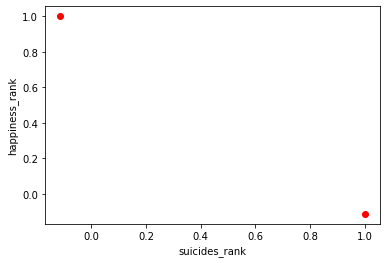

In [82]:
import matplotlib.pyplot as plt
corre = hap_sui.loc[:, ["happiness_rank", "suicides_rank"]].corr()
print(corre)
plt.plot(corre["happiness_rank"],corre["suicides_rank"],"ro")
plt.ylabel("happiness_rank")
plt.xlabel("suicides_rank")

__Respuesta:__  < Claramente son inversamente proporcionales, esto implica si un pais esta mas cerca del 1 en el happiness_rank, mas al final esta este en el suicides_rank.
 >

¿Qué tipo de correlación lineal hay entre las variables `happiness_rank` y `suicides_rank` por cada año?

                    year  happiness_rank  suicides_rank
year            1.000000        0.070840       0.149121
happiness_rank  0.070840        1.000000      -0.113848
suicides_rank   0.149121       -0.113848       1.000000


Text(0.5, 0, 'suicides_rank')

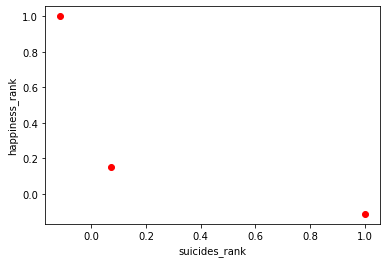

In [83]:
corre = hap_sui.loc[:, ["year","happiness_rank", "suicides_rank"]].corr()
print(corre)
plt.plot(corre["happiness_rank"],corre["suicides_rank"],"ro")
plt.ylabel("happiness_rank")
plt.xlabel("suicides_rank")

__Respuesta:__  < Se puede ver que el año afecta poco a la correlacion entre happiness_rank y suicides_rank >

¿La respuesta de las dos preguntas anteriores cambia si se utilizan las variables `happiness_score` y `suicides_ratio_100k`?

                     happiness_score  suicides_ratio_100k
happiness_score             1.000000             0.021455
suicides_ratio_100k         0.021455             1.000000


Text(0.5, 0, 'suicides_ratio_100k')

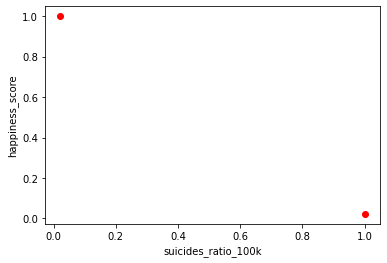

In [84]:
corre = hap_sui.loc[:, ["happiness_score", "suicides_ratio_100k"]].corr()
print(corre)
plt.plot(corre["happiness_score"],corre["suicides_ratio_100k"],"ro")
plt.ylabel("happiness_score")
plt.xlabel("suicides_ratio_100k")

                         year  happiness_score  suicides_ratio_100k
year                 1.000000        -0.064468             0.166808
happiness_score     -0.064468         1.000000             0.021455
suicides_ratio_100k  0.166808         0.021455             1.000000


Text(0.5, 0, 'suicides_ratio_100k')

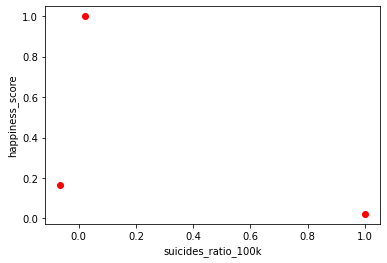

In [85]:
corre = hap_sui.loc[:, ["year","happiness_score", "suicides_ratio_100k"]].corr()
print(corre)
plt.plot(corre["happiness_score"],corre["suicides_ratio_100k"],"ro")
plt.ylabel("happiness_score")
plt.xlabel("suicides_ratio_100k")

Como se puede ver en el primer caso se mantiene que es inversamente proporcional, pero en el segundo vemos que los punto no se portan como una "linea", esto implica que el año si afecta, esto tiene sentido dado que el happiness_score puede variar mucho de año a año, mientras que el happiness_rank se puede mantener bastante constante debido a que es una comparacion entre paises.

### III.- LearnPlatform

<img src="https://iltpp.org/wp-content/uploads/2020/11/LearnPlatform.png" width="480" height="360" align="center"/>

### Introducción

Nelson Mandela creía que la educación era el arma más poderosa para cambiar el mundo. Pero no todos los estudiantes tienen las mismas oportunidades de aprender. Es necesario promulgar políticas y planes efectivos para que la educación sea más equitativa, y tal vez su innovador análisis de datos ayude a revelar la solución.

La investigación actual muestra que los resultados educativos están lejos de ser equitativos. El desequilibrio se vio agravado por la pandemia de COVID-19. Existe una necesidad urgente de comprender y medir mejor el alcance y el impacto de la pandemia en estas inequidades.

La empresa de tecnología educativa LearnPlatform se fundó en 2014 con la misión de ampliar el acceso equitativo a la tecnología educativa para todos los estudiantes y profesores. Los distritos y estados utilizan el sistema integral de efectividad de la tecnología educativa de LearnPlatform para mejorar continuamente la seguridad, la equidad y la efectividad de su tecnología educativa. LearnPlatform lo hace generando una base de evidencia de lo que está funcionando y promulgándola en beneficio de los estudiantes, los profesores y los presupuestos.

En esta competencia de análisis, trabajará para descubrir tendencias en el aprendizaje digital. Logre esto con un análisis de datos sobre cómo el compromiso con el aprendizaje digital se relaciona con factores como la demografía del distrito, el acceso a la banda ancha y las políticas y eventos a nivel estatal / nacional. Luego, envíe un notebook de Kaggle para proponer su mejor solución a estas desigualdades educativas.

Sus presentaciones informarán las políticas y prácticas que cierran la brecha digital. Con una mejor comprensión de las tendencias de aprendizaje digital, puede ayudar a revertir la pérdida de aprendizaje a largo plazo entre los más vulnerables de Estados Unidos, haciendo que la educación sea más equitativa.

### Planteamiento del problema
La pandemia COVID-19 ha interrumpido el aprendizaje de más de 56 millones de estudiantes en los Estados Unidos. En la primavera de 2020, la mayoría de los gobiernos estatales y locales de los EE. UU. Cerraron las instituciones educativas para detener la propagación del virus. En respuesta, las escuelas y los maestros han intentado llegar a los estudiantes de forma remota a través de herramientas de aprendizaje a distancia y plataformas digitales. Hasta el día de hoy, las preocupaciones sobre la exacerbación de la brecha digital y la pérdida de aprendizaje a largo plazo entre los estudiantes más vulnerables de Estados Unidos continúan creciendo.

### Desafío
Los estudiantes deben explorar (1) el estado del aprendizaje digital en 2020 y (2) cómo la participación del aprendizaje digital se relaciona con factores como la demografía del distrito, el acceso a banda ancha y las políticas y eventos a nivel estatal/nacional.

Le recomendamos que oriente el análisis con preguntas relacionadas con los temas descritos anteriormente (en negrita). A continuación se muestran algunos ejemplos de preguntas que se relacionan con el planteamiento de nuestro problema:

* ¿Cuál es el panorama de la conectividad y el compromiso digitales en 2020?
* ¿Cuál es el efecto de la pandemia de COVID-19 en el aprendizaje en línea y a distancia, y cómo podría evolucionar también en el futuro?
* ¿Cómo cambia la participación de los estudiantes con los diferentes tipos de tecnología educativa durante el transcurso de la pandemia?
* ¿Cómo se relaciona la participación de los estudiantes con las plataformas de aprendizaje en línea con las diferentes geografías? ¿Contexto demográfico (por ejemplo, raza/etnia, ESL, discapacidad de aprendizaje)? Contexto de aprendizaje? ¿Estatus socioeconómico?
* ¿Se correlacionan ciertas intervenciones, prácticas o políticas estatales (por ejemplo, estímulo, reapertura, moratoria de desalojo) con el aumento o la disminución de la participación en línea?

### Evaluación


#### Claridad 

* ¿El autor presentó un hilo claro de preguntas o temas que motivaron su análisis?
* ¿El autor documentó por qué/cómo se eligió y utilizó un conjunto de métodos para su análisis?
* ¿Está documentado el notebook de una manera que sea fácilmente reproducible (p. Ej., Código, fuentes de datos adicionales, citas)?
* ¿El notebook contiene visualizaciones de datos claras que ayuden a comunicar de manera eficaz los hallazgos del autor tanto a expertos como a no expertos?

#### Precisión 

* ¿El autor procesó los datos (por ejemplo, fusionando) y/o fuentes de datos adicionales con precisión?
* ¿La metodología utilizada en el análisis es apropiada y razonable?
* ¿Son razonables y convincentes las interpretaciones basadas en el análisis y la visualización?

#### Creatividad 

* ¿El notebook ayuda al lector a aprender algo nuevo o lo desafía a pensar de una manera nueva?
* ¿El notebook aprovecha métodos novedosos y/o visualizaciones que ayudan a revelar información a partir de datos y/o comunicar hallazgos?
* ¿El autor utilizó fuentes de datos públicas adicionales en su análisis?

#### Hints

* Esto corresponde a un desafio de Kaggle ([link](https://www.kaggle.com/c/learnplatform-covid19-impact-on-digital-learning/overview/description)).
* La descripción de las columnas, lo pueden encontrar en el siguiente [link](https://www.kaggle.com/c/learnplatform-covid19-impact-on-digital-learning/data).
* Los datos del desafio se encuentran en el siguiente [link](https://drive.google.com/drive/folders/15t3gGwGNazuW5Zs4Mj_9_d2sMJdJg7qo).
* A modo de inspiración, pueden ocupar algunos gráficos de otros participantes del desafío ([link](https://www.kaggle.com/c/learnplatform-covid19-impact-on-digital-learning/code)).

In [86]:
# libraries
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# read data

## products dataset
path = 'data/learnplatform-covid19-impact-on-digital-learning/'
products_df = pd.read_csv(path + "products_info.csv")
products_df.columns = [x.lower().replace(' ','_') for x in products_df.columns]

FileNotFoundError: [Errno 2] No such file or directory: 'data/learnplatform-covid19-impact-on-digital-learning/products_info.csv'

In [ ]:
## districts dataset
districts_df = pd.read_csv(path +"districts_info.csv")

In [ ]:
## engagement dataset
path = 'data/learnplatform-covid19-impact-on-digital-learning/engagement_data/' 
all_files = glob.glob(path + "/*.csv")
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    district_id = filename.split("/")[-1].split(".")[0]
    df["district_id"] = district_id
    li.append(df)
engagement_df = pd.concat(li)
engagement_df = engagement_df.reset_index(drop=True)